<a href="https://colab.research.google.com/github/Prethumnan/Guvi-projects/blob/main/Text_and_image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image and text processing

In [ ]:
!pip install pytesseract
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )

In [ ]:
#importing necessary libraries
import pytesseract
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize
import re



In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

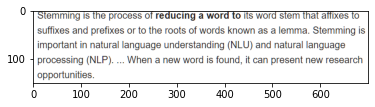

In [ ]:
#Reading image
img=cv2.imread("data.PNG")
plt.imshow(img)

In [ ]:
#seeing the pixels of image
pixels=np.array(img)
pixels

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
#converting image to string
para=pytesseract.image_to_string(img)
print(para)

Stemming is the process of reducing a word to its word stem that affixes to
suffixes and prefixes or to the roots of words known as a lemma. Stemming is
important in natural language understanding (NLU) and natural language
processing (NLP). ... When a new word is found, it can present new research
opportunities.



In [ ]:
#Tokenization
sent=sent_tokenize(para)
sent

['Stemming is the process of reducing a word to its word stem that affixes to\nsuffixes and prefixes or to the roots of words known as a lemma.',
 'Stemming is\nimportant in natural language understanding (NLU) and natural language\nprocessing (NLP).',
 '...',
 'When a new word is found, it can present new research\nopportunities.']

In [ ]:
#Text preprocessing
stem=PorterStemmer()
final=[]
for i in sent:
    n=i.split()
    m=[]
    for j in n:
        a=re.sub("[^a-zA-Z]","",j)
        a=a.lower()
        if a not in stopwords.words("english"):
            m.append(stem.stem(a))
    final.append((" ".join(m)))
    

for i in final:
    if i=="":
        final.remove(i)
final

['stem process reduc word word stem affix suffix prefix root word known lemma',
 'stem import natur languag understand nlu natur languag process nlp',
 'new word found present new research opportun']

In [ ]:
#Encoding the text
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
#size of vocabulary
v=5000
one=[one_hot(word,v) for word in final]
one

[[3484, 4607, 3924, 4126, 4126, 3484, 654, 1871, 1813, 4867, 4126, 20, 3308],
 [3484, 1906, 4072, 2928, 1289, 2233, 4072, 2928, 4607, 716],
 [2878, 4126, 2446, 2501, 2878, 267, 4826]]

In [ ]:
#Making each row of same length
after=pad_sequences(one,padding="post",maxlen=len(one[0]))
after

array([[3484, 4607, 3924, 4126, 4126, 3484,  654, 1871, 1813, 4867, 4126,
          20, 3308],
       [3484, 1906, 4072, 2928, 1289, 2233, 4072, 2928, 4607,  716,    0,
           0,    0],
       [2878, 4126, 2446, 2501, 2878,  267, 4826,    0,    0,    0,    0,
           0,    0]], dtype=int32)

# Handling missing values in time series

In [ ]:
data=pd.date_range("1/1/22",periods=31)
df=pd.DataFrame(index=data)
m=[987,604, 311, 225, 587, 327, 444, np.nan, 470, 237, 152, 554, 868,
        977, np.nan, 993, 747, 225, 127, 728, 256, 115, 582, 559,np.nan,
        689, 416, 282, 375, np.nan,943]

df["sales"]=m
df

,sales
2022-01-01,987.0
2022-01-02,604.0
2022-01-03,311.0
2022-01-04,225.0
2022-01-05,587.0
2022-01-06,327.0
2022-01-07,444.0
2022-01-08,NaN
2022-01-09,470.0
2022-01-10,237.0


In [ ]:
df.isnull().sum()

sales    4
dtype: int64

In [ ]:
#Backward filling
new=df.bfill()
new

,sales
2022-01-01,987.0
2022-01-02,604.0
2022-01-03,311.0
2022-01-04,225.0
2022-01-05,587.0
2022-01-06,327.0
2022-01-07,444.0
2022-01-08,470.0
2022-01-09,470.0
2022-01-10,237.0


In [ ]:
#Forward filling
ff=df.ffill()
ff

,sales
2022-01-01,987.0
2022-01-02,604.0
2022-01-03,311.0
2022-01-04,225.0
2022-01-05,587.0
2022-01-06,327.0
2022-01-07,444.0
2022-01-08,444.0
2022-01-09,470.0
2022-01-10,237.0


In [ ]:
#Interpolation method
inter=df.interpolate()
inter

,sales
2022-01-01,987.0
2022-01-02,604.0
2022-01-03,311.0
2022-01-04,225.0
2022-01-05,587.0
2022-01-06,327.0
2022-01-07,444.0
2022-01-08,457.0
2022-01-09,470.0
2022-01-10,237.0
